In [1]:
%matplotlib inline

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 


In [2]:
try:
    df = pd.read_csv('./Training_Data/sclerochronology_training_1.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [3]:
df.head()

master_chronology1  61261
year                           
649             1.936838    NaN
650             1.605328    NaN
651             1.079118    NaN
652             0.424857    NaN
653            -0.415379    NaN

In [4]:
samples = []
i= 0
for col in df.columns:
    col_list = df[col].tolist()
    cleanedList = [x for x in col_list if x == x]
    samples.append(cleanedList)
print(samples)
print(len(samples))
print(len(samples[1]))  


[[1.936838481, 1.605328427, 1.079118093, 0.424857487, -0.415379142, -0.31108195, 0.369677032, 0.48068699, 0.010854986, 0.230856345, 1.772309398, 1.556165602, 1.823282499, 1.0222408, 1.292814337, 1.034969212, 0.901032981, 1.13027091, 1.715414673, 0.993393389, 1.850822571, 2.442041392, 0.857572185, 0.700019051, 1.138055918, 1.250789931, -0.097870558, 0.453070437, -0.333305342, 0.504733741, 1.899954477, 0.051051639, 1.78828375, 0.86615834, 0.809999495, -0.178119801, 0.901369303, 0.716136721, 1.536897697, 1.731422168, 2.000601153, 2.620271926, 0.537737633, 0.400781936, 2.190152718, 0.103830399, 0.355241377, 0.983944721, 0.376496977, 1.662446171, 0.952252259, -0.322735529, 0.089002856, 1.467448995, 2.252157677, 1.659527541, 0.490924974, 0.762300621, 1.794865524, 2.537889544, 0.842956782, 2.057922679, -0.344389753, -0.48525862, -0.341097262, 0.274200499, 0.322065686, 3.368399598, -0.049570852, 0.373415028, 3.251336099, 1.365383313, 1.829605354, 2.157757686, -0.139121435, 1.218136579, -0.5443

# Small Segment Statistical Method

In [5]:
#Helper method: Splitting an array into even sized chunks with a given overlap. (Using lists of lists and dictionaries.)

segments = {}

size = 10
step = 1
length = len(samples)
for j in range(length):
    segments[j] = ([samples[j][i : i + size] for i in range(0, len(samples[j]), step)])
    j+=1
#print(segments[0])
#print(segments[1])

short = []

for i in range(len(segments)):
    for j in range(len(segments[i])):
        if len(segments[i][j]) != 10:
            #print(segments[i][j])
            short.append(segments[i][j])
            j+=1
        else:
            continue
    i+=1

#print(short)
segments0 = [x for x in segments[0] if x not in short]
segments1 = [x for x in segments[1] if x not in short]
    
#print(segments0)

segments[0] = segments0
segments[1] = segments1
segments[0][-1]
print(segments[1][-1])
assert len(segments[0][-1]) == 10
assert len(segments[1][-1]) == 10

[2.602808828, 1.160401914, -0.348868952, 0.533399687, 0.343637381, 0.409988327, 1.81329642, 0.907865036, 0.283188092, 2.233491429]


In [6]:
#Get every combination of the sample segment with the first master segement then moves onto the next one and so on
master_segments = segments[0]
sample_segments = segments[1]
pairs =  [(x,y) for x in master_segments for y in sample_segments]
#print(pairs)

print(len(pairs))
pairs.index(([1.605328427, 1.079118093, 0.424857487, -0.415379142, -0.31108195, 0.369677032, 0.48068699, 0.010854986, 0.230856345, 1.772309398],[0.744327798, 0.737504805, 1.609655534, 1.669530251, 1.569741757, 0.482696117, -0.427576371, 2.817509901, 1.036183314, -0.00170256]))
len(pairs) /59

79532


1348.0

In [7]:
import scipy.stats
t_vals = {}
for i in range(len(pairs)):
    (seg1, seg2) = pairs[i]
    if len(seg1) == len(seg2) == 10:
        r = scipy.stats.pearsonr(seg1, seg2)[0]
        n = min(len(seg1), len(seg2))
        t = (r * (np.sqrt(n - 2)) / (np.sqrt(1 - (r * r))))
        t_vals[t] = (seg1,seg2)
    else: 
        print(seg1,seg2)
#print(t_vals)
print(len(t_vals))
#t_vals.keys()

79532


In [70]:
values = list(t_vals.keys())
print(len(values)/59)
n = 10
endlist = [[] for _ in range(n)]
for index, item in enumerate(values):
    endlist[index % n].append(item)
#print(endlist)

strides = [0]
length = int(len(values)//59)
for i in range(length):
    strides.append(59+i)
    i+=1

chronology = []
t_values_samples = []

for i in range(59):
    for j in range(len(strides)):
        chronology.append(values[strides[j]])
        j+=1
    strides = [x+1 for x in strides]
    t_values_samples.append(chronology)
    chronology = []
    i+=1
result = []
for i in range(len(t_values_samples)):
    result.append(sum(abs(number) for number in t_values_samples[i]))
max_list = (max(result, key=abs))

print(result.index(max_list))

max_val = (max(t_values_samples[25], key=abs))
print(max_list)
print(max_val)
#print(t_values_samples)
#print(len(t_values_samples))
std = np.std(values)
mean = np.mean(values)
#print(mean)
out_up = mean+3*std
#print(out_up)
out_down = mean-3*std
#print(out_down)
outlying = []
for x in range(len(values)):
    if values[x] >= out_up or values[x] <= out_down: 
        outlying.append(values[x])
#print(outlying)

#Find the length of the list of pairs for the sample list
#Make sure all the lists of length less than 10 are deleted 
#Collect the t values with a loop using a gap of the list length + 1 and then adding one
#Find the highest 3 lists with the most consistant high t values
#Check these t values are actually statisically signinficant
#Add the padding and place the chronologies into the dataframe



max_outlying = (max(values, key=abs))
print(max_outlying)

1348.0
25
1246.3275602737128
7.303478373572987
12.77403285879134


In [61]:
print(len(t_vals.keys()) / 59)
heatmap =np.array(np.split(np.array(values), 59, axis=0))
heatmap.shape

1348.0


(59, 1348)

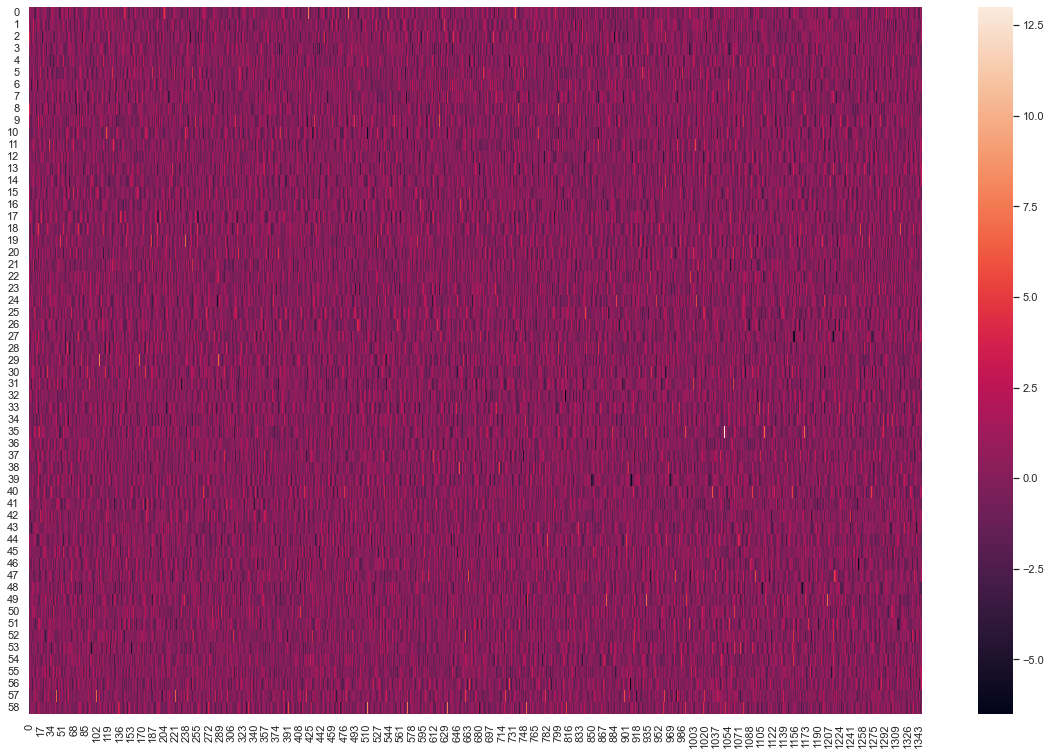

In [62]:
sns.set(rc={'figure.figsize':(20,13)})
sns.heatmap(heatmap, vmin=-6.5, vmax=13)
plt.show()

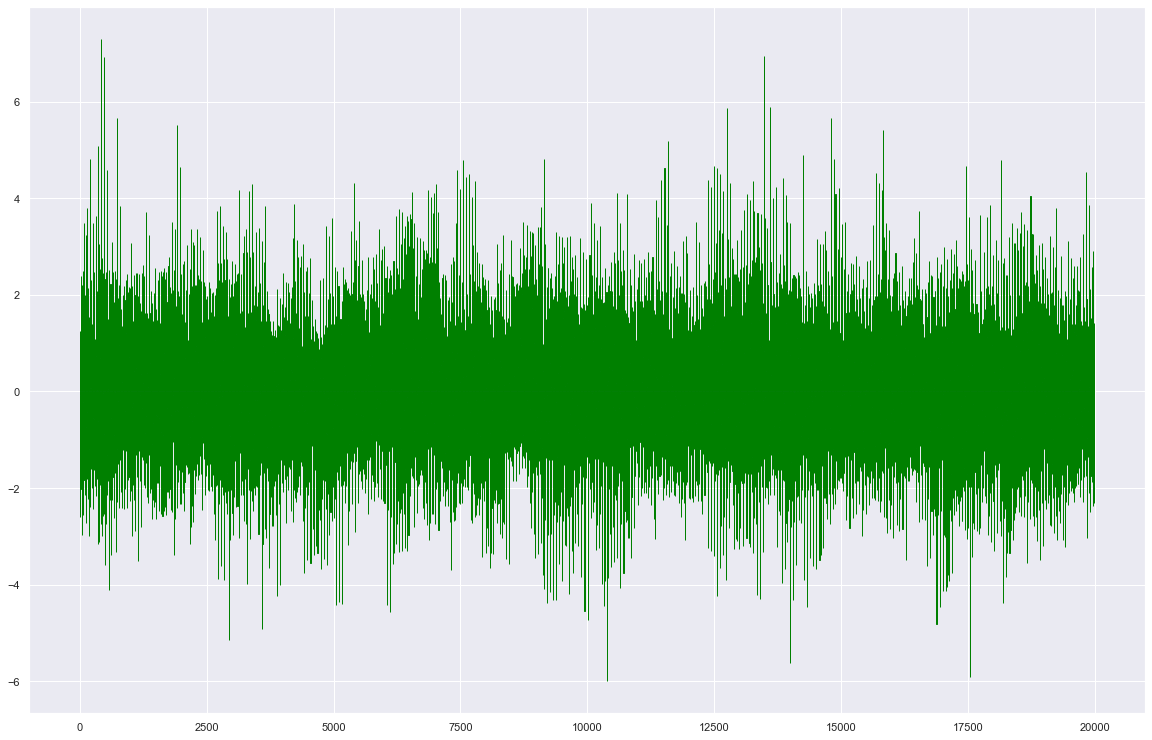

In [73]:
cols = ['red' if x < 68 else 'green' if 68 <= x < 136 else 'blue' if 136 <= x < 204 else 'yellow' if 204 <= x < 272 else 'red' if 272 <= x <340 else '']
sns.set(rc={'figure.figsize':(20,13)})
plt.bar( list(range(len(values[:20000]))), values[:20000],  edgecolor='green')
plt.show()

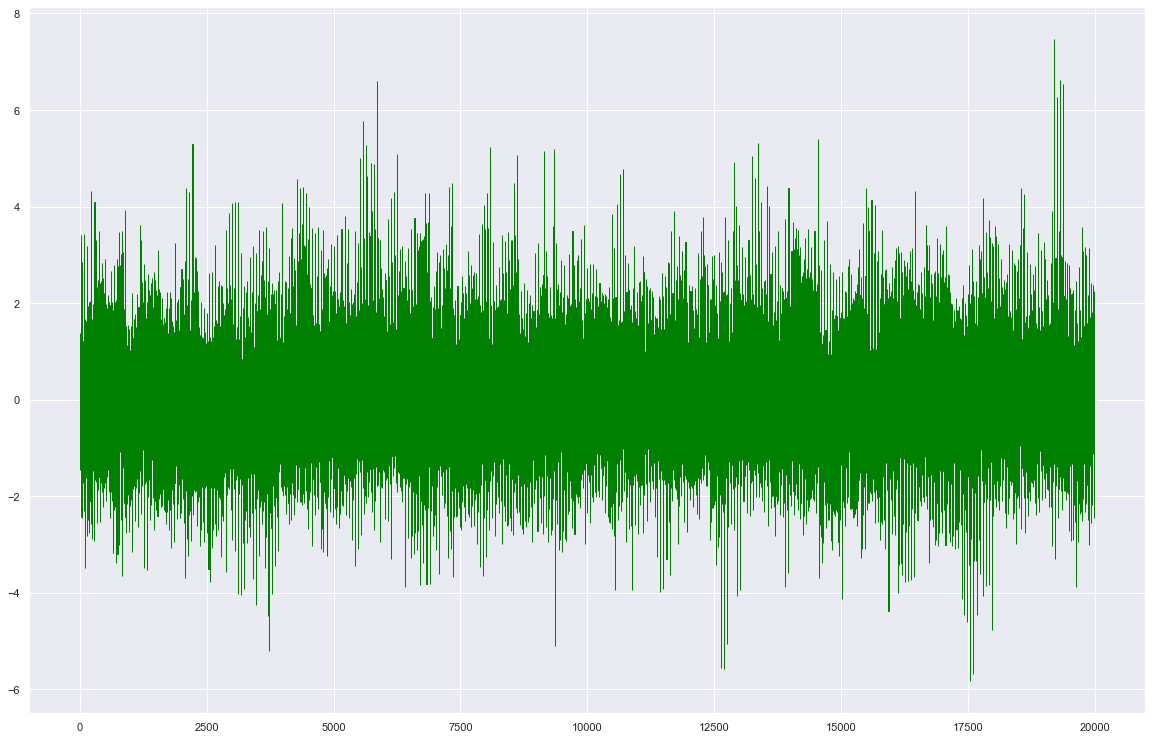

In [89]:
cols = ['red' if x < 68 else 'green' if 68 <= x < 136 else 'blue' if 136 <= x < 204 else 'yellow' if 204 <= x < 272 else 'red' if 272 <= x <340 else '']
sns.set(rc={'figure.figsize':(20,13)})
plt.bar( list(range(len(values[20000:40000]))), values[20000:40000],  edgecolor='green')
plt.show()

In [74]:
(master_seg, sample_seg) = t_vals[max_outlying]
print(master_seg, sample_seg)
#Would need to check both lists are sequential for the entire segment 
print(samples[0].index(master_seg[0]))
print(samples[0].index(master_seg[1]))
print(samples[1].index(sample_seg[0]))
print(samples[1].index(sample_seg[1]))


[0.50100996, 0.329663755, 0.103865576, 0.645123468, 0.433394566, 0.54020831, 0.665582556, 0.853882446, 1.725960966, 2.211811538] [-0.1712716, 0.018807919, -0.484650095, 0.132784371, 0.293359482, 0.664135965, 0.467983898, 1.50229497, 2.914811048, 3.721373208]
817
818
27
28


In [75]:
samples[0].index(master_seg[0]) - samples[1].index(sample_seg[0])


790

In [76]:
#Fix the padding issues (Think i may have cracked it)
#Need a way not to hard code the column names in 
indices = np.where(df["master_chronology1"] == master_seg[0])
indices2 = np.where(df["61261"] == samples[0][0])
print(indices)
print(indices2)
print(samples[1].index(sample_seg[0]))
start = indices[0]-samples[1].index(sample_seg[0])-1
print("start",start)
print("Legth",len(samples[1]))
beginning = df.index[0]
print("Beginning",beginning)
ending = df.index[-1]
print("Ending", ending)
padding = start[0]-1
padding_end = len(df.index) - (padding + len(samples[1])) 
print("Padding",padding)
print(1283-649)
print(padding_end)
chronology = []
for i in range(padding):
    chronology.append(None)
    i+=1
for j in range(len(samples[1])):
    chronology.append(samples[1][j])
    j+=1
if padding_end > 0 :
    for k in range(padding_end):
        chronology.append(None)
        k+=1
else:
    deletion = int(len(chronology)-(ending-beginning))-1
    print("Deletion", deletion)
    for x in range(deletion):
        chronology.pop()
        x+=1
    
#if len(chronology) > (ending-beginning):
   # print("Length", (ending-beginning))
    #deletion = int(len(chronology)-(ending-beginning))
   # print("Deletion", deletion)
    #for x in range(deletion-1):
      #  chronology.pop()
       # x+=1
print(chronology)

df['Algined']= chronology


(array([817]),)
(array([], dtype=int64),)
27
start [789]
Legth 68
Beginning 649
Ending 2005
Padding 788
634
501
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,

<AxesSubplot:xlabel='year'>

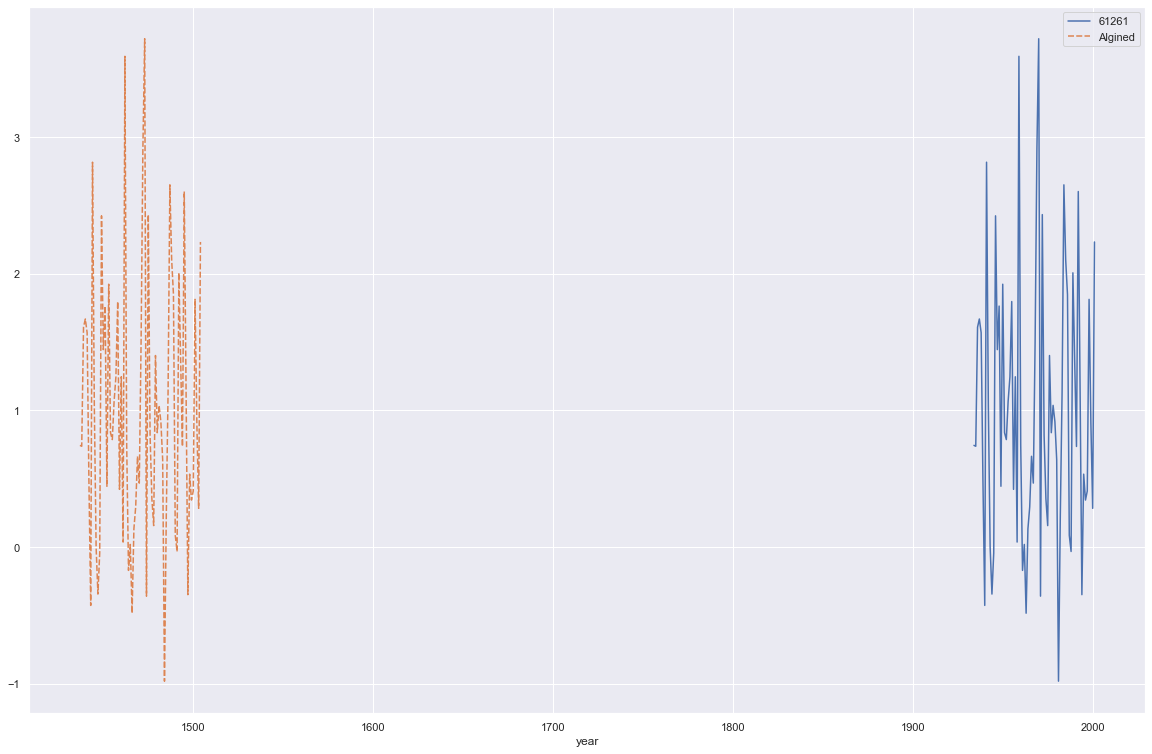

In [77]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df[["61261",'Algined']])

<AxesSubplot:xlabel='year'>

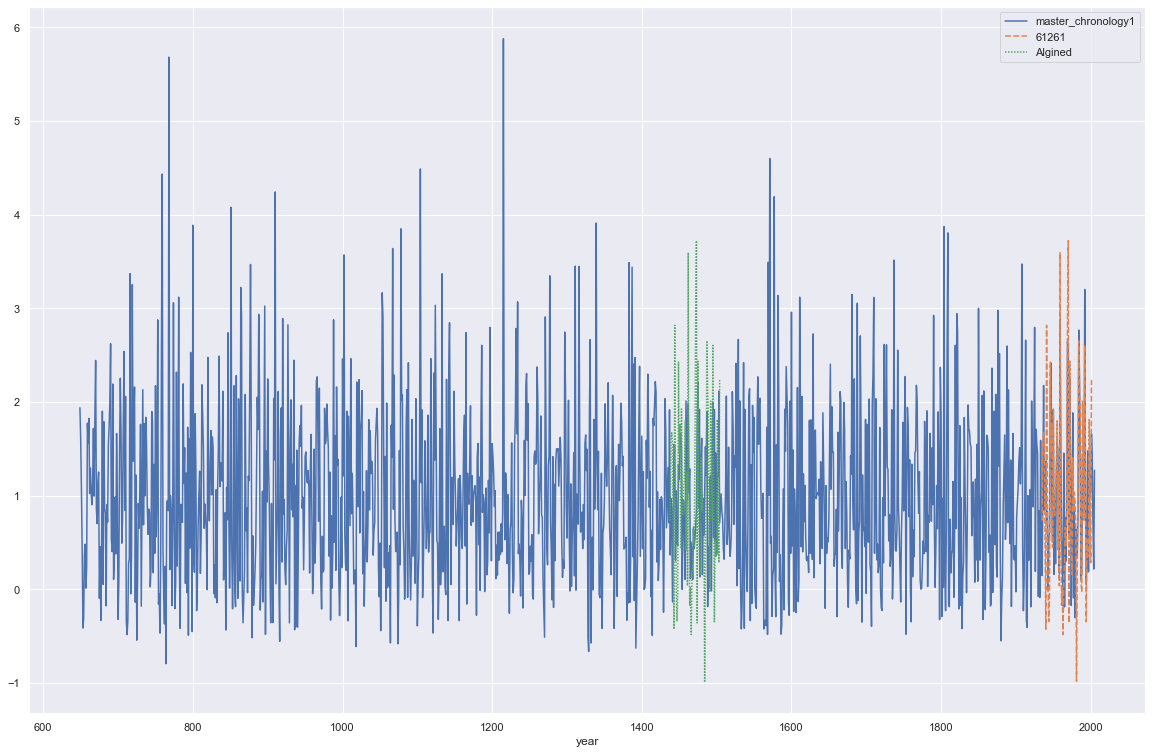

In [78]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df[["master_chronology1","61261",'Algined']])

# Large Sections Statistical method

In [79]:
large_segments = {}

size = len(samples[1])
step = 1
length = len(samples)
for j in range(length):
    large_segments[j] = ([samples[j][i : i + size] for i in range(0, len(samples[j]), step)])
    j+=1
print(large_segments[0])
print(large_segments[1])

for i in range(len(large_segments)):
    for j in range(len(large_segments[i][j])):
        if len(large_segments[i][j]) != size:
            print(large_segments[i][j])
            large_segments[i][j].delete()
            j+=1
    i+=1

[[1.936838481, 1.605328427, 1.079118093, 0.424857487, -0.415379142, -0.31108195, 0.369677032, 0.48068699, 0.010854986, 0.230856345, 1.772309398, 1.556165602, 1.823282499, 1.0222408, 1.292814337, 1.034969212, 0.901032981, 1.13027091, 1.715414673, 0.993393389, 1.850822571, 2.442041392, 0.857572185, 0.700019051, 1.138055918, 1.250789931, -0.097870558, 0.453070437, -0.333305342, 0.504733741, 1.899954477, 0.051051639, 1.78828375, 0.86615834, 0.809999495, -0.178119801, 0.901369303, 0.716136721, 1.536897697, 1.731422168, 2.000601153, 2.620271926, 0.537737633, 0.400781936, 2.190152718, 0.103830399, 0.355241377, 0.983944721, 0.376496977, 1.662446171, 0.952252259, -0.322735529, 0.089002856, 1.467448995, 2.252157677, 1.659527541, 0.490924974, 0.762300621, 1.794865524, 2.537889544, 0.842956782, 2.057922679, -0.344389753, -0.48525862, -0.341097262, 0.274200499, 0.322065686, 3.368399598], [1.605328427, 1.079118093, 0.424857487, -0.415379142, -0.31108195, 0.369677032, 0.48068699, 0.010854986, 0.23085

In [80]:
master_segments1 = large_segments[0]
sample_segments1 = large_segments[1]
large_pairs =  [(x,y) for x in master_segments1 for y in sample_segments1]
print(large_pairs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [81]:
import scipy.stats
large_t_vals = {}
for i in range(len(large_pairs)):
    (seg1, seg2) = large_pairs[i]
    if len(seg1) == len(seg2) == len(samples[1]):
        r = scipy.stats.pearsonr(seg1, seg2)[0]
        n = min(len(seg1), len(seg2))
        t = (r * (np.sqrt(n - 2)) / (np.sqrt(1 - (r * r))))
        large_t_vals[t] = (seg1,seg2)
print(large_t_vals)
large_t_vals.keys()

{0.42380867055082966: ([1.936838481, 1.605328427, 1.079118093, 0.424857487, -0.415379142, -0.31108195, 0.369677032, 0.48068699, 0.010854986, 0.230856345, 1.772309398, 1.556165602, 1.823282499, 1.0222408, 1.292814337, 1.034969212, 0.901032981, 1.13027091, 1.715414673, 0.993393389, 1.850822571, 2.442041392, 0.857572185, 0.700019051, 1.138055918, 1.250789931, -0.097870558, 0.453070437, -0.333305342, 0.504733741, 1.899954477, 0.051051639, 1.78828375, 0.86615834, 0.809999495, -0.178119801, 0.901369303, 0.716136721, 1.536897697, 1.731422168, 2.000601153, 2.620271926, 0.537737633, 0.400781936, 2.190152718, 0.103830399, 0.355241377, 0.983944721, 0.376496977, 1.662446171, 0.952252259, -0.322735529, 0.089002856, 1.467448995, 2.252157677, 1.659527541, 0.490924974, 0.762300621, 1.794865524, 2.537889544, 0.842956782, 2.057922679, -0.344389753, -0.48525862, -0.341097262, 0.274200499, 0.322065686, 3.368399598], [0.744327798, 0.737504805, 1.609655534, 1.669530251, 1.569741757, 0.482696117, -0.42757637

dict_keys([0.42380867055082966, -1.979687638821567, 0.3052169194325047, 2.1004323576761634, 0.9488522439607181, 1.2561244376509786, 0.19319444629360935, -1.4243067303046342, 0.3897878331741815, 0.9723971959927368, -2.6318692203039045, -0.6028219953184268, -1.8560413030067595, -1.3641705067131935, -0.2034940441573058, 0.43987088369182775, 1.0148908310967353, 1.2289424411806609, 0.615475383659886, 0.83960004075141, 0.3463125822491446, 0.0026911748304178328, 0.6997994105737653, 1.1149385868907455, -0.970249217870989, 0.41754807406248007, -1.83907269735676, -1.9144248739012528, -0.4242067845115913, 0.8070696910998312, -1.7195174999665577, -0.1861045985777593, 0.5441518206382432, 0.20822064497548276, 2.0910798618255106, 0.9961191264334921, 1.034429374098034, 1.718166087229205, -0.7877884790632381, -1.1021205376459735, -1.0366589913600455, -1.2019721922661866, 0.8693203471414699, -1.5193524374387806, -2.3077485087145386, 1.7276161684790863, 1.9169937482116826, 0.6234961660689243, -0.60501457

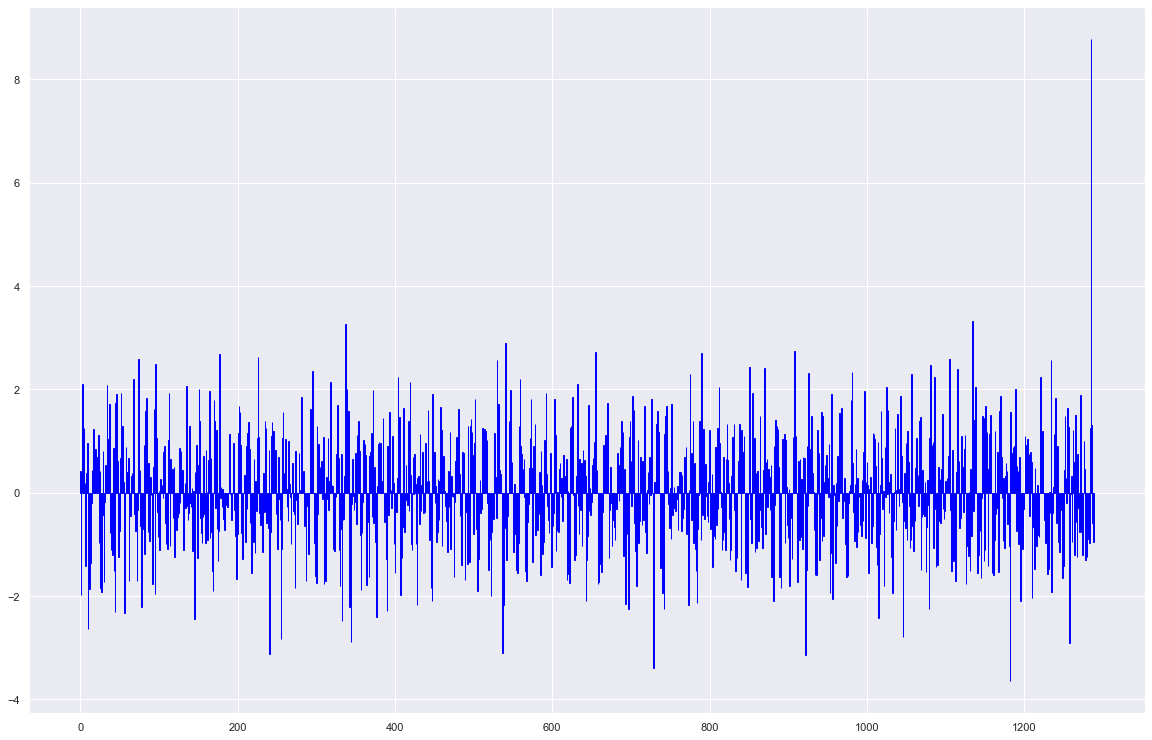

In [82]:
large_values = list(large_t_vals.keys())
sns.set(rc={'figure.figsize':(20,13)})
plt.bar( list(range(len(large_values))), large_values, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.show()

In [83]:
n = len(samples[1])
endlist = [[] for _ in range(n)]
for index, item in enumerate(large_values):
    endlist[index % n].append(item)
print(endlist)

large_std = np.std(large_values)
large_mean = np.mean(large_values)
print(large_mean)
large_out_up = large_mean+3*large_std
print(large_out_up)
large_out_down = large_mean-3*large_std
print(large_out_down)
large_outlying = []
for x in range(len(large_values)):
    if large_values[x] >= large_out_up or large_values[x] <= large_out_down: 
        large_outlying.append(values[x])
print(large_outlying)

#Find the length of the list of pairs for the sample list
#Make sure all the lists of length less than 10 are deleted 
#Collect the t values with a loop using a gap of the list length + 1 and then adding one
#Find the highest 3 lists with the most consistant high t values
#Check these t values are actually statisically signinficant
#Add the padding and place the chronologies into the dataframe



large_max_outlying = (max(large_values, key=abs))
print(large_max_outlying)

[[0.42380867055082966, 2.1974965966990125, -0.2617833123623519, 0.9268556334639766, -0.4097525243534384, 0.9750924967845565, -1.6150357476808115, -0.1854853834629901, -0.03656921706157508, 0.277434473440382, -0.9083610771186025, -0.2238922487701837, -1.0985207510631434, 1.416085192980986, 0.9508964683752954, -0.3188957483986546, -1.4439482690251788, 1.1418993337882357, 0.8194387110389956], [-1.979687638821567, -0.40344402125022044, -0.5174056843254147, -0.7842601329225424, -1.8511616218703926, 1.580581955926203, -1.268861931343185, 0.6225202175092338, 1.386597025815279, -0.5421208101805416, -0.16372110101909035, -0.675932710852785, -0.9074271033701992, 0.1950723530858308, -1.940466568024155, 0.025334553741516018, -1.0003992815309632, 1.5115854047972173, -0.08910571345081977], [0.3052169194325047, -0.7428659655670153, -0.39464259300761007, -1.2817354777906922, 0.8153408067520523, -2.2045385375114654, -0.6651465129149595, 1.0759666729806512, 0.8779019937835878, 0.7401484447678506, -0.321

In [84]:
(master_seg1, sample_seg1) = large_t_vals[large_max_outlying]
print(master_seg1, sample_seg1)
#Would need to check both lists are sequential for the entire segment 
print(samples[0].index(master_seg1[0]))
print(samples[0].index(master_seg1[1]))
print(samples[1].index(sample_seg1[0]))
print(samples[1].index(sample_seg1[1]))


[0.276655719, 0.145112558, 1.046589149, 2.174904848, 0.842435048, 1.258658818, 1.368880999, 0.69863438, 0.830886393, -0.00820425, 0.534273942, 0.597156932, 2.161667766, 2.415307112, 0.969133699, 0.501145021, 1.914125507, 0.157856264, 0.994870381, 0.27149899, 1.226489039, 1.597437024, 1.475668069, 0.509919073, 0.17176143, 2.878813758, 1.53605392, 0.58913451, 0.282591306, -0.177122377, 1.452272042, -0.189524253, 0.762222409, 0.299306232, 0.855830851, 2.643632999, 2.528113969, 0.534313446, 2.25967243, 1.26976055, -0.174321338, 0.7574617, 1.88252025, -0.093678678, 0.900529967, -0.303256613, 0.642253076, 0.361474848, 0.372973326, 0.806538715, 2.766661367, 2.254032845, 1.282305812, 0.104664617, 0.166462045, 1.394677935, 1.20175918, 0.810010639, 3.20048871, 1.00000635, 0.051581377, 0.389166981, 1.475974643, 0.185010428, 1.322578743, 0.971332156, 1.034463934, 1.657925393] [0.744327798, 0.737504805, 1.609655534, 1.669530251, 1.569741757, 0.482696117, -0.427576371, 2.817509901, 1.036183314, -0.0

In [85]:
samples[0].index(master_seg1[0]) - samples[1].index(sample_seg1[0])


1285

In [86]:
#Fix the padding issues (Think i may have cracked it)
#Need a way not to hard code the column names in 
indices = np.where(df["master_chronology1"] == master_seg1[0])
indices2 = np.where(df["61261"] == samples[0][0])
print(indices)
print(indices2)
print(samples[1].index(sample_seg1[0]))
start = indices[0]-samples[1].index(sample_seg1[0])
print("start",start)
print("Legth",len(samples[1]))
beginning = df.index[0]
print("Beginning",beginning)
ending = df.index[-1]
print("Ending", ending)
padding = start[0]
padding_end = len(df.index) - (padding + len(samples[1])) 
print("Padding",padding)
print(1283-649)
print(padding_end)
chronology = []
for i in range(padding):
    chronology.append(None)
    i+=1
for j in range(len(samples[1])):
    chronology.append(samples[1][j])
    j+=1
if padding_end > 0 :
    for k in range(padding_end):
        chronology.append(None)
        k+=1
else:
    deletion = int(len(chronology)-(ending-beginning))-1
    print("Deletion", deletion)
    for x in range(deletion):
        chronology.pop()
        x+=1
    
#if len(chronology) > (ending-beginning):
   # print("Length", (ending-beginning))
    #deletion = int(len(chronology)-(ending-beginning))
   # print("Deletion", deletion)
    #for x in range(deletion-1):
      #  chronology.pop()
       # x+=1
print(chronology)

df['Large_Algined']= chronology


(array([1285]),)
(array([], dtype=int64),)
0
start [1285]
Legth 68
Beginning 649
Ending 2005
Padding 1285
634
4
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,

<AxesSubplot:xlabel='year'>

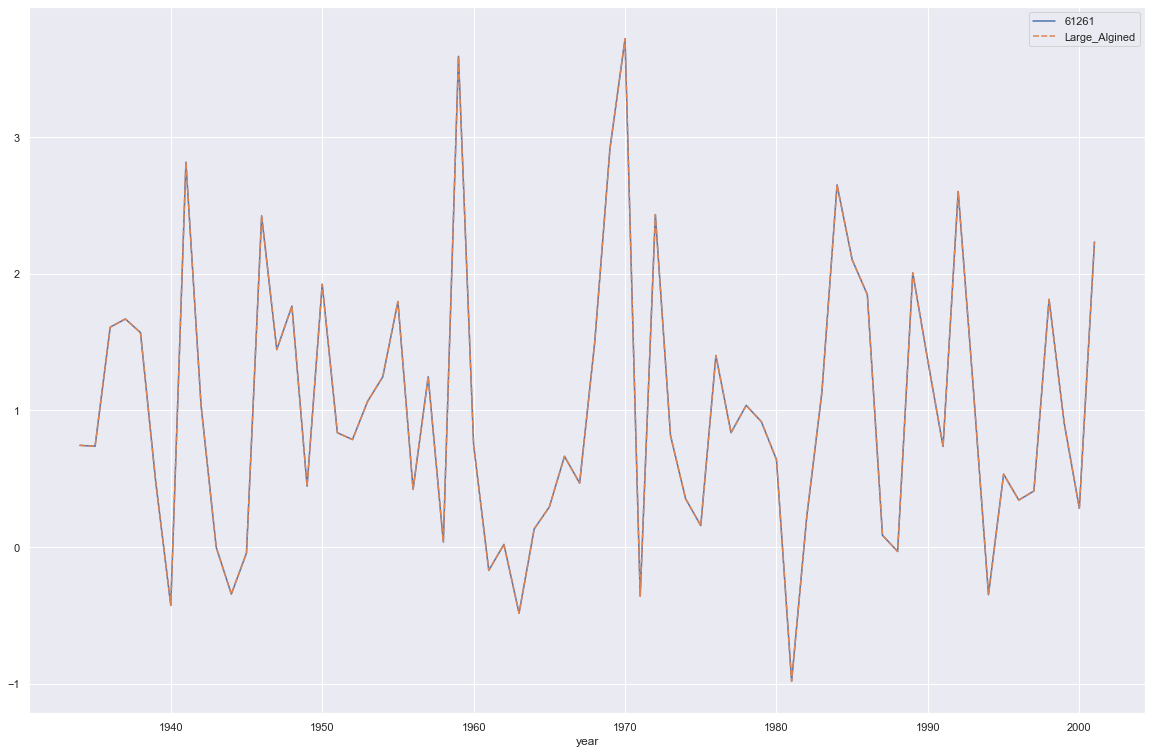

In [87]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df[["61261",'Large_Algined']])

<AxesSubplot:xlabel='year'>

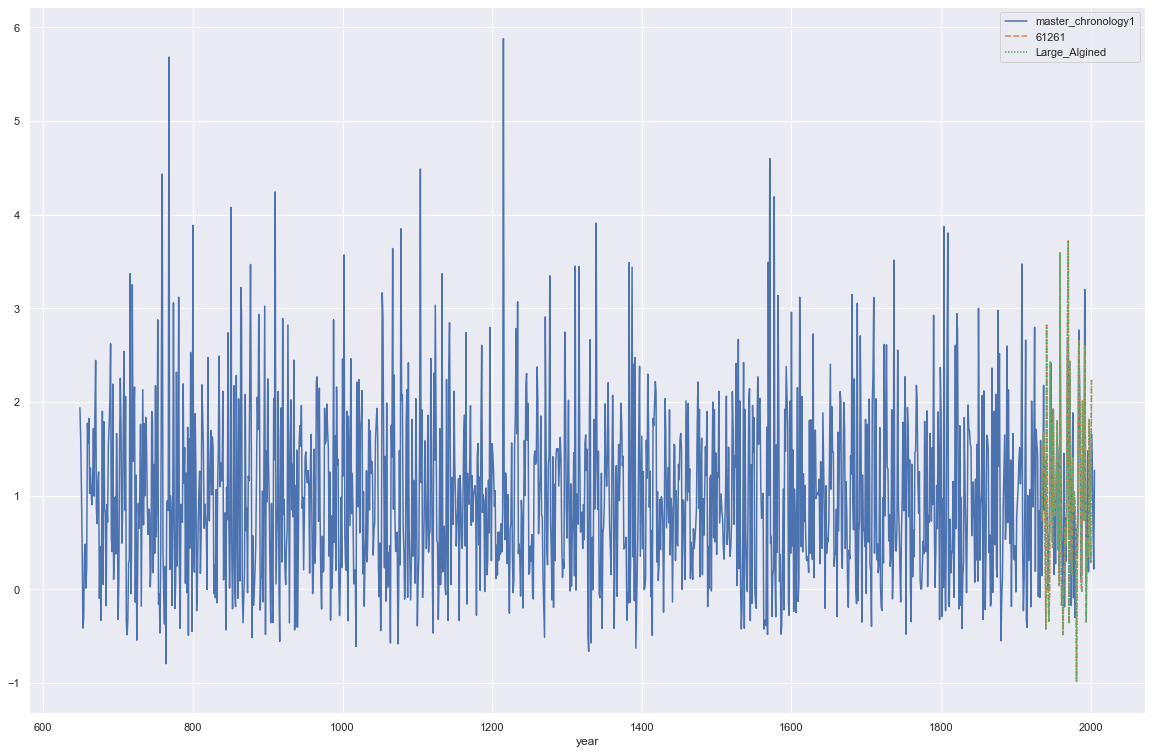

In [88]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df[["master_chronology1","61261",'Large_Algined']])